In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
#read the csv file into dataframe
df=pd.read_csv('/content/kc_house_data.csv')

In [61]:
#Preprocessing of Data
#getting to know about the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21612 non-null  int64         
 1   date           21612 non-null  datetime64[ns]
 2   price          21612 non-null  float64       
 3   bedrooms       21612 non-null  int64         
 4   bathrooms      21612 non-null  float64       
 5   sqft_living    21612 non-null  int64         
 6   sqft_lot       21612 non-null  int64         
 7   floors         21612 non-null  float64       
 8   waterfront     21612 non-null  int64         
 9   condition      21612 non-null  int64         
 10  grade          21612 non-null  int64         
 11  sqft_above     21610 non-null  float64       
 12  sqft_basement  21612 non-null  int64         
 13  yr_built       21612 non-null  int64         
 14  yr_renovated   21612 non-null  int64         
 15  zipcode        2161

In [4]:
#view dataframe
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
#finding the shape of dataframe
df.shape

(21613, 21)

In [6]:
#find the mean, count, min, max, percentile, standard deviation of given data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#delete unnecessary column
del df['lat']

In [11]:
#dataframe
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,-122.069,1410,1287


In [12]:
#view first 5 records
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,-122.045,1800,7503


In [62]:
#view last 5 records
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,"360,000",3,2,1530,1131,3,0,3,8,"1,530",0,2009,0,98103,1530,1509
21609,6600060120,2015-02-23,"400,000",4,2,2310,5813,2,0,3,8,"2,310",0,2014,0,98146,1830,7200
21610,1523300141,2014-06-23,"402,101",2,1,1020,1350,2,0,3,7,"1,020",0,2009,0,98144,1020,2007
21611,291310100,2015-01-16,"400,000",3,2,1600,2388,2,0,3,8,"1,600",0,2004,0,98027,1410,1287
21612,1523300157,2014-10-15,"325,000",2,1,1020,1076,2,0,3,7,"1,020",0,2008,0,98144,1020,1357


In [13]:
#delete unnecessary column
del df['long']


In [14]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,1800,7503


In [15]:
#delete unnecessary column
del df['view']

In [16]:
#view first 5 records
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,0,98074,1800,7503


In [17]:
#finding value counts of no of bedrooms
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [18]:
#removing outlier with '33' bedrooms
df=df[df['bedrooms']!=33]

In [19]:
#check if the outlier is removed
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [20]:
#conevrting data column into float type
pd.options.display.float_format = '{:,.0f}'.format
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900",3,1,1180,5650,1,0,3,7,"1,180",0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,"538,000",3,2,2570,7242,2,0,3,7,"2,170",400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,"180,000",2,1,770,10000,1,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,"604,000",4,3,1960,5000,1,0,5,7,"1,050",910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,"510,000",3,2,1680,8080,1,0,3,8,"1,680",0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,"360,000",3,2,1530,1131,3,0,3,8,"1,530",0,2009,0,98103,1530,1509
21609,6600060120,20150223T000000,"400,000",4,2,2310,5813,2,0,3,8,"2,310",0,2014,0,98146,1830,7200
21610,1523300141,20140623T000000,"402,101",2,1,1020,1350,2,0,3,7,"1,020",0,2009,0,98144,1020,2007
21611,291310100,20150116T000000,"400,000",3,2,1600,2388,2,0,3,8,"1,600",0,2004,0,98027,1410,1287


In [21]:
#formatting the unncessary values in data column
df['date']=[x[:8] for x in df['date']]
df

<ipython-input-21-3c8ce392da33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=[x[:8] for x in df['date']]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013,"221,900",3,1,1180,5650,1,0,3,7,"1,180",0,1955,0,98178,1340,5650
1,6414100192,20141209,"538,000",3,2,2570,7242,2,0,3,7,"2,170",400,1951,1991,98125,1690,7639
2,5631500400,20150225,"180,000",2,1,770,10000,1,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209,"604,000",4,3,1960,5000,1,0,5,7,"1,050",910,1965,0,98136,1360,5000
4,1954400510,20150218,"510,000",3,2,1680,8080,1,0,3,8,"1,680",0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,"360,000",3,2,1530,1131,3,0,3,8,"1,530",0,2009,0,98103,1530,1509
21609,6600060120,20150223,"400,000",4,2,2310,5813,2,0,3,8,"2,310",0,2014,0,98146,1830,7200
21610,1523300141,20140623,"402,101",2,1,1020,1350,2,0,3,7,"1,020",0,2009,0,98144,1020,2007
21611,291310100,20150116,"400,000",3,2,1600,2388,2,0,3,8,"1,600",0,2004,0,98027,1410,1287


In [22]:
#changing date column into date type using pandas
df['date']=pd.to_datetime(df["date"])
df

<ipython-input-22-421bac2e4cac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df["date"])


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900",3,1,1180,5650,1,0,3,7,"1,180",0,1955,0,98178,1340,5650
1,6414100192,2014-12-09,"538,000",3,2,2570,7242,2,0,3,7,"2,170",400,1951,1991,98125,1690,7639
2,5631500400,2015-02-25,"180,000",2,1,770,10000,1,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,2014-12-09,"604,000",4,3,1960,5000,1,0,5,7,"1,050",910,1965,0,98136,1360,5000
4,1954400510,2015-02-18,"510,000",3,2,1680,8080,1,0,3,8,"1,680",0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,"360,000",3,2,1530,1131,3,0,3,8,"1,530",0,2009,0,98103,1530,1509
21609,6600060120,2015-02-23,"400,000",4,2,2310,5813,2,0,3,8,"2,310",0,2014,0,98146,1830,7200
21610,1523300141,2014-06-23,"402,101",2,1,1020,1350,2,0,3,7,"1,020",0,2009,0,98144,1020,2007
21611,291310100,2015-01-16,"400,000",3,2,1600,2388,2,0,3,8,"1,600",0,2004,0,98027,1410,1287


In [23]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21612 non-null  int64         
 1   date           21612 non-null  datetime64[ns]
 2   price          21612 non-null  float64       
 3   bedrooms       21612 non-null  int64         
 4   bathrooms      21612 non-null  float64       
 5   sqft_living    21612 non-null  int64         
 6   sqft_lot       21612 non-null  int64         
 7   floors         21612 non-null  float64       
 8   waterfront     21612 non-null  int64         
 9   condition      21612 non-null  int64         
 10  grade          21612 non-null  int64         
 11  sqft_above     21610 non-null  float64       
 12  sqft_basement  21612 non-null  int64         
 13  yr_built       21612 non-null  int64         
 14  yr_renovated   21612 non-null  int64         
 15  zipcode        2161

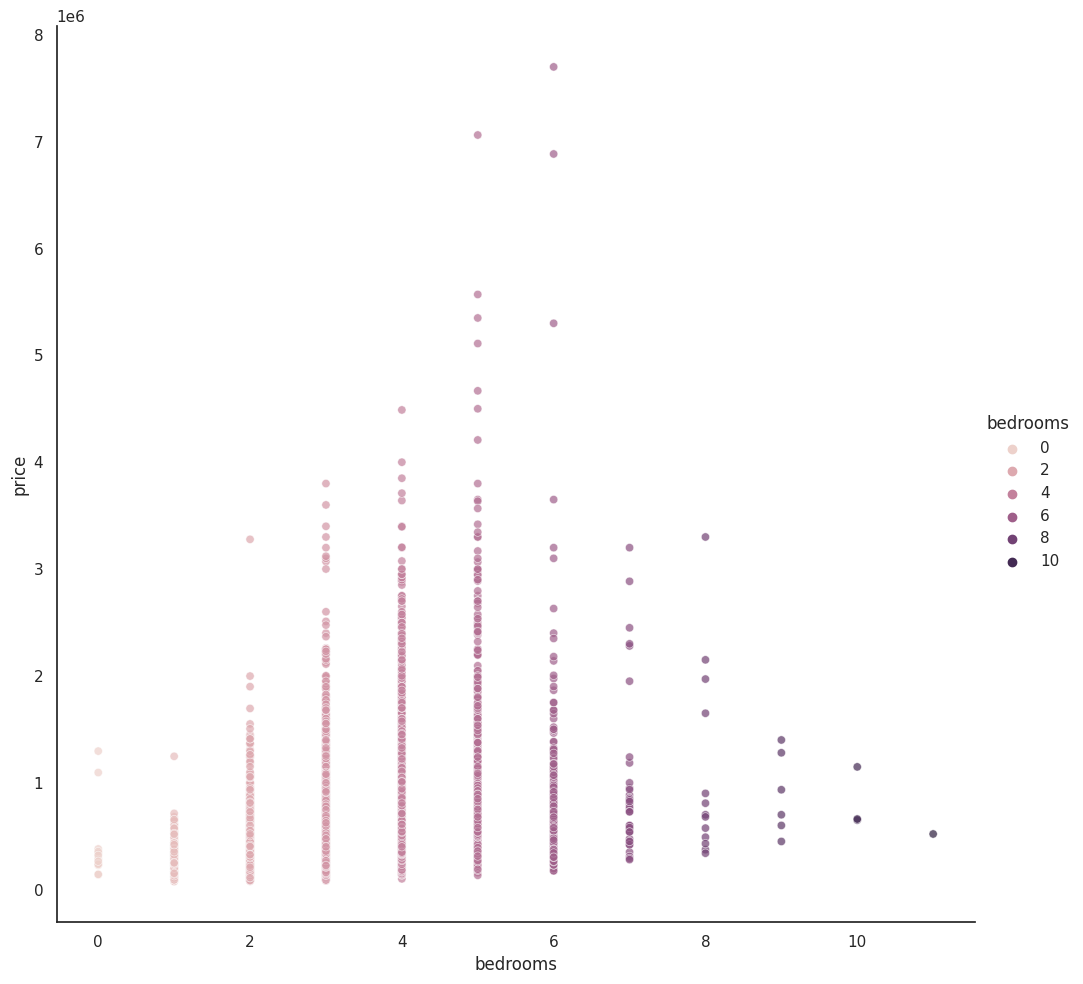

In [24]:
# Plots for understanding or Analysis
#A plot is plotted for finding dates vs price. Graphs are plotted for finding the relationship between sqft_living vs price, sqft_lot vs price, condition vs price.

#replot for bedrooms and price
sns.set(style='white')
sns.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=df)


<Axes: xlabel='bedrooms', ylabel='price'>

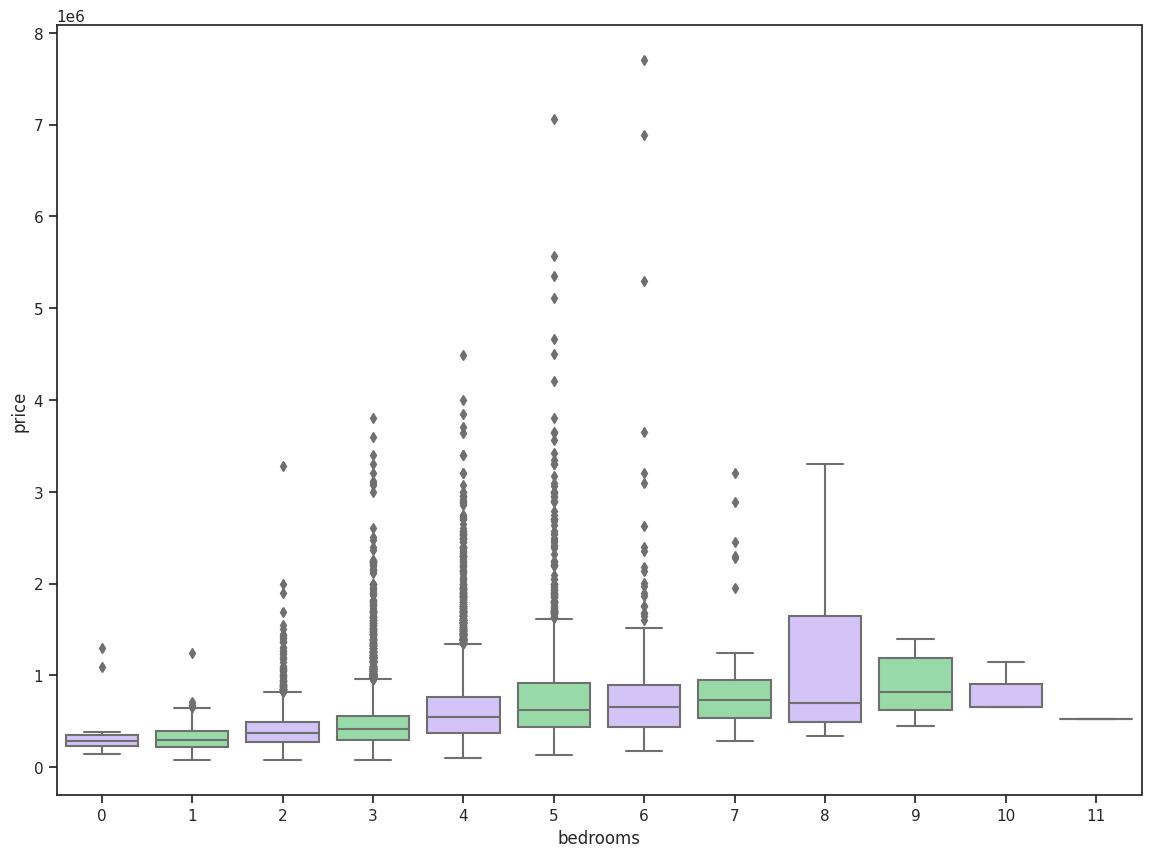

In [25]:
#plot boxplot graph for bedrooms and price
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10))
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=df,ax=ax)

<Axes: xlabel='bathrooms', ylabel='price'>

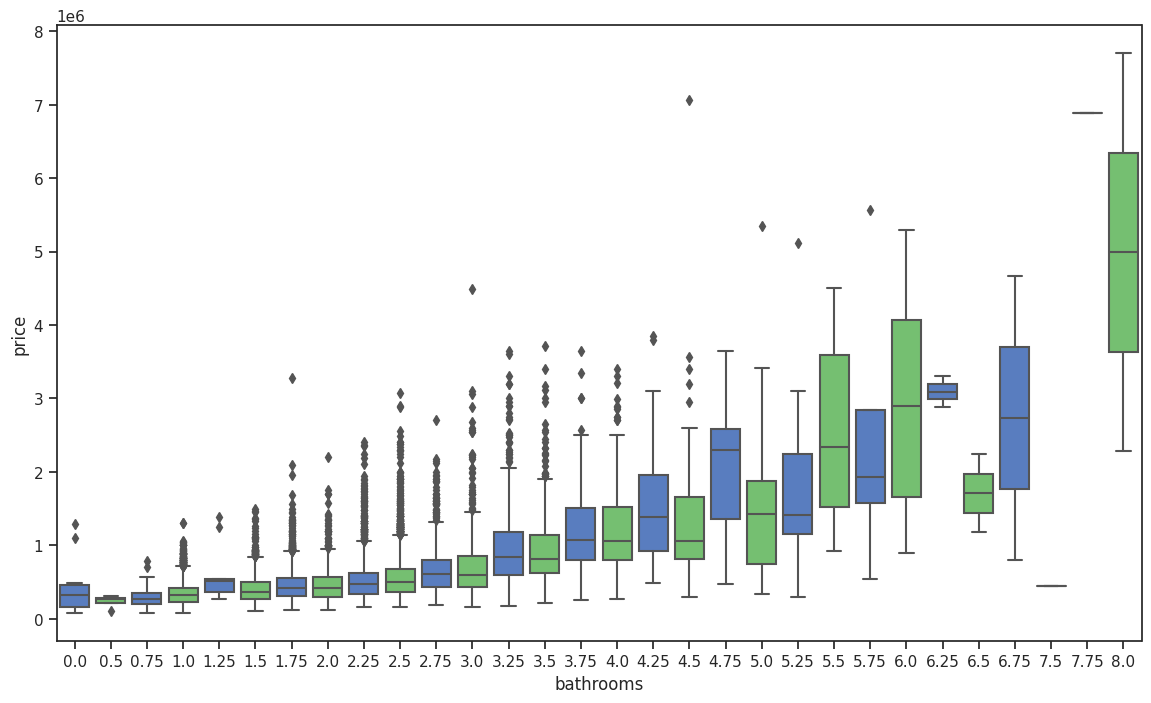

In [26]:
#boxplot between bathrooms and price
sns.set(style='ticks',palette='muted')
fig,ax=plt.subplots(figsize=(14,8))
sns.boxplot(x='bathrooms',y='price',palette=["b", "g"],data=df,ax=ax)

In [27]:
#find correlation
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,1,-0,0,0,-0,-0,0,-0,-0,0,-0,-0,0,-0,-0,-0,-0
price,-0,1,0,1,1,0,0,0,0,1,1,0,0,0,-0,1,0
bedrooms,0,0,1,1,1,0,0,-0,0,0,0,0,0,0,-0,0,0
bathrooms,0,1,1,1,1,0,1,0,-0,1,1,0,1,0,-0,1,0
sqft_living,-0,1,1,1,1,0,0,0,-0,1,1,0,0,0,-0,1,0
sqft_lot,-0,0,0,0,0,1,-0,0,-0,0,0,0,0,0,-0,0,1
floors,0,0,0,1,0,-0,1,0,-0,0,1,-0,0,0,-0,0,-0
waterfront,-0,0,-0,0,0,0,0,1,0,0,0,0,-0,0,0,0,0
condition,-0,0,0,-0,-0,-0,-0,0,1,-0,-0,0,-0,-0,0,-0,-0
grade,0,1,0,1,1,0,0,0,-0,1,1,0,0,0,-0,1,0


<ipython-input-28-fcca0d7d06d0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)


<Axes: >

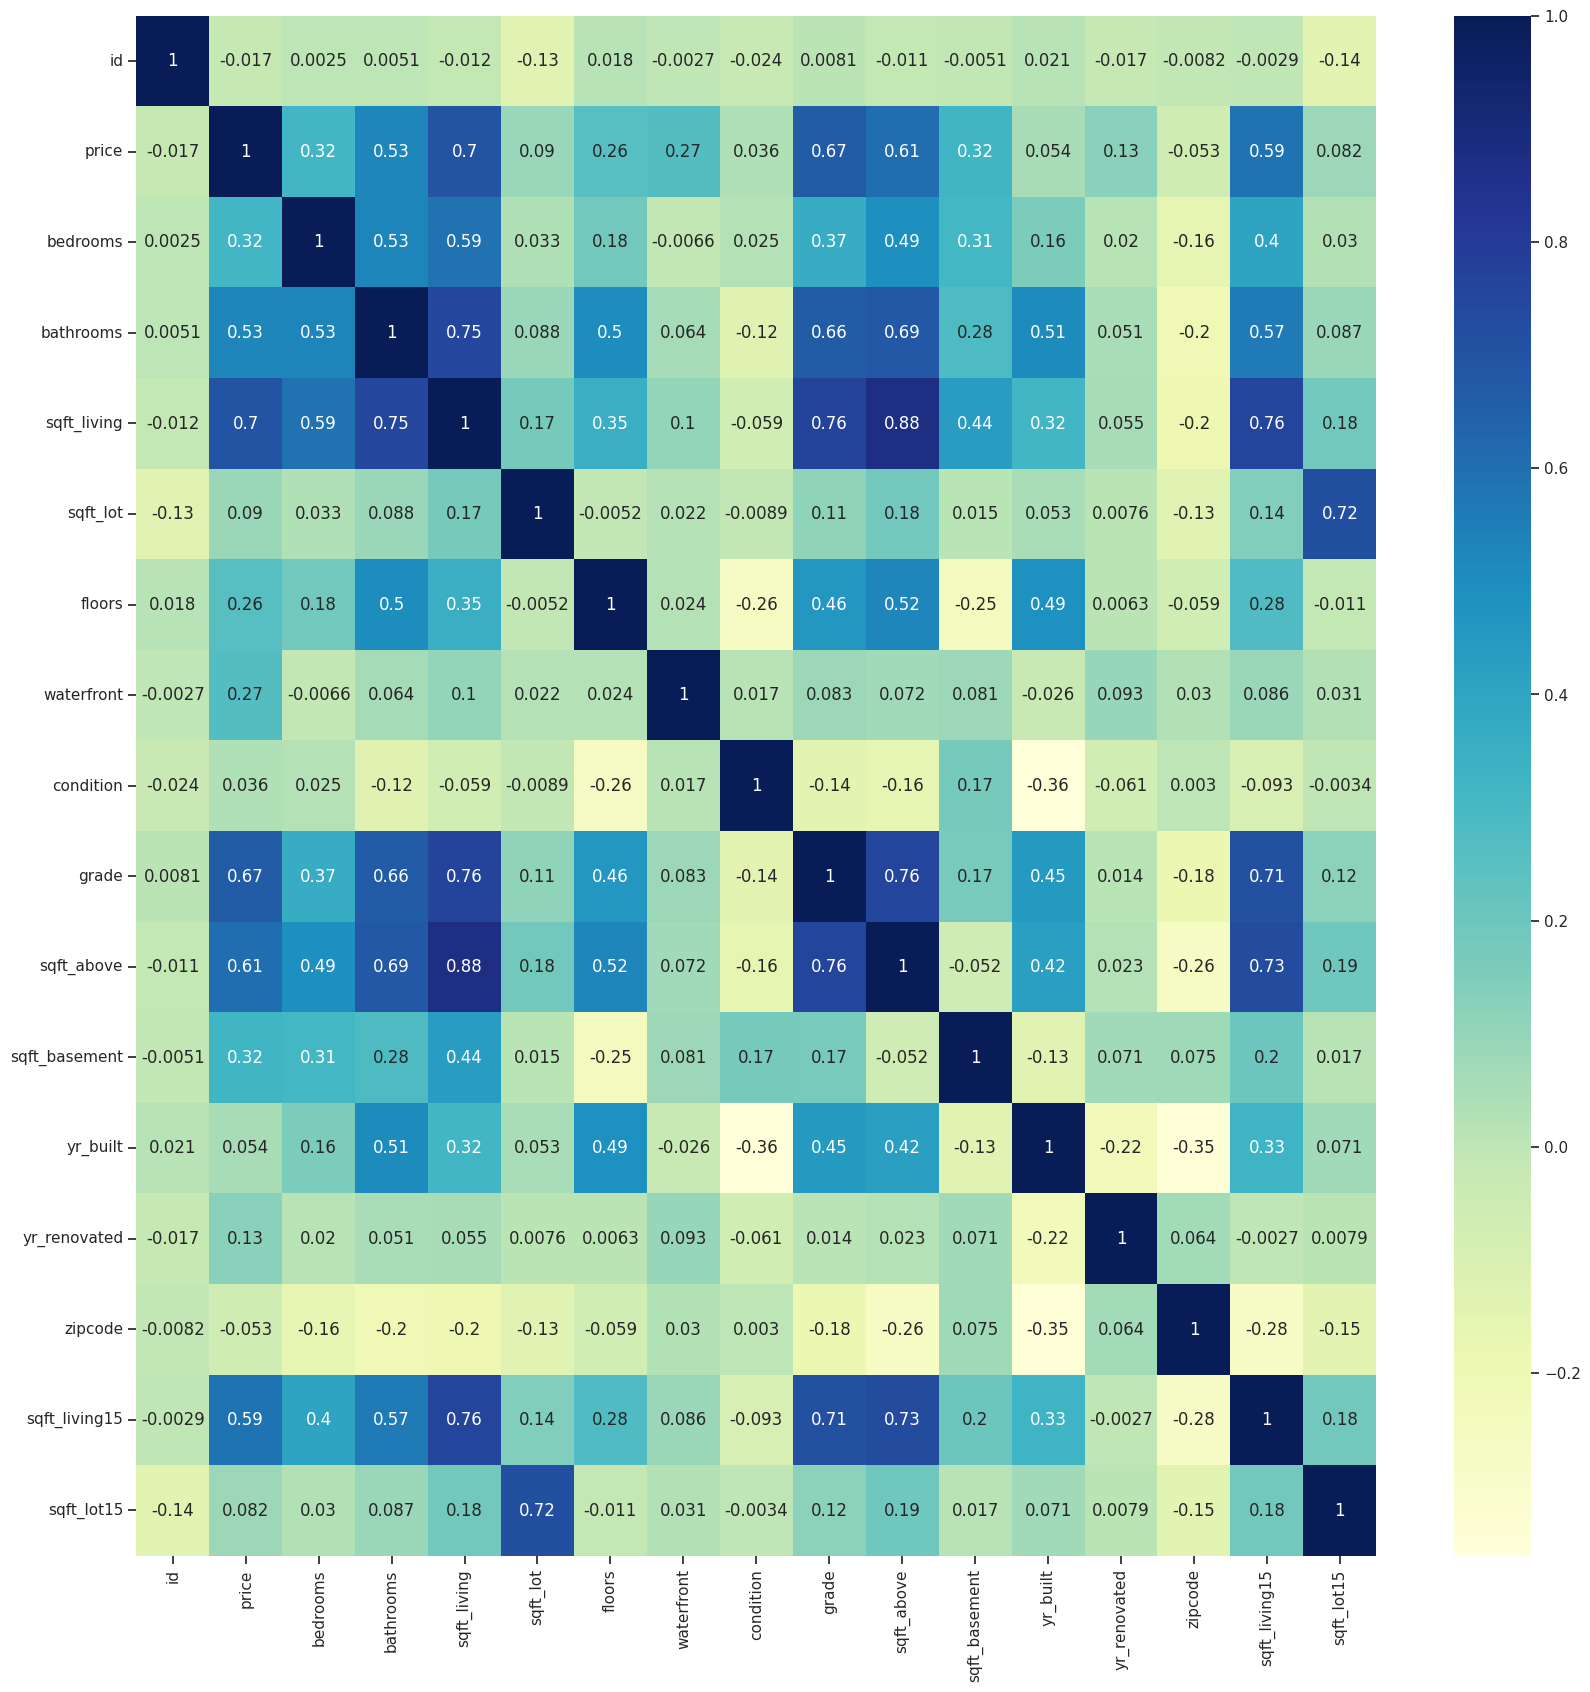

In [28]:
#heatmap for all the required features for correlation
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
     'sqft_living15', 'sqft_lot15']]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

bedrooms
0     Axes(0.125,0.2;0.775x0.68)
1     Axes(0.125,0.2;0.775x0.68)
2     Axes(0.125,0.2;0.775x0.68)
3     Axes(0.125,0.2;0.775x0.68)
4     Axes(0.125,0.2;0.775x0.68)
5     Axes(0.125,0.2;0.775x0.68)
6     Axes(0.125,0.2;0.775x0.68)
7     Axes(0.125,0.2;0.775x0.68)
8     Axes(0.125,0.2;0.775x0.68)
9     Axes(0.125,0.2;0.775x0.68)
10    Axes(0.125,0.2;0.775x0.68)
11    Axes(0.125,0.2;0.775x0.68)
Name: price, dtype: object

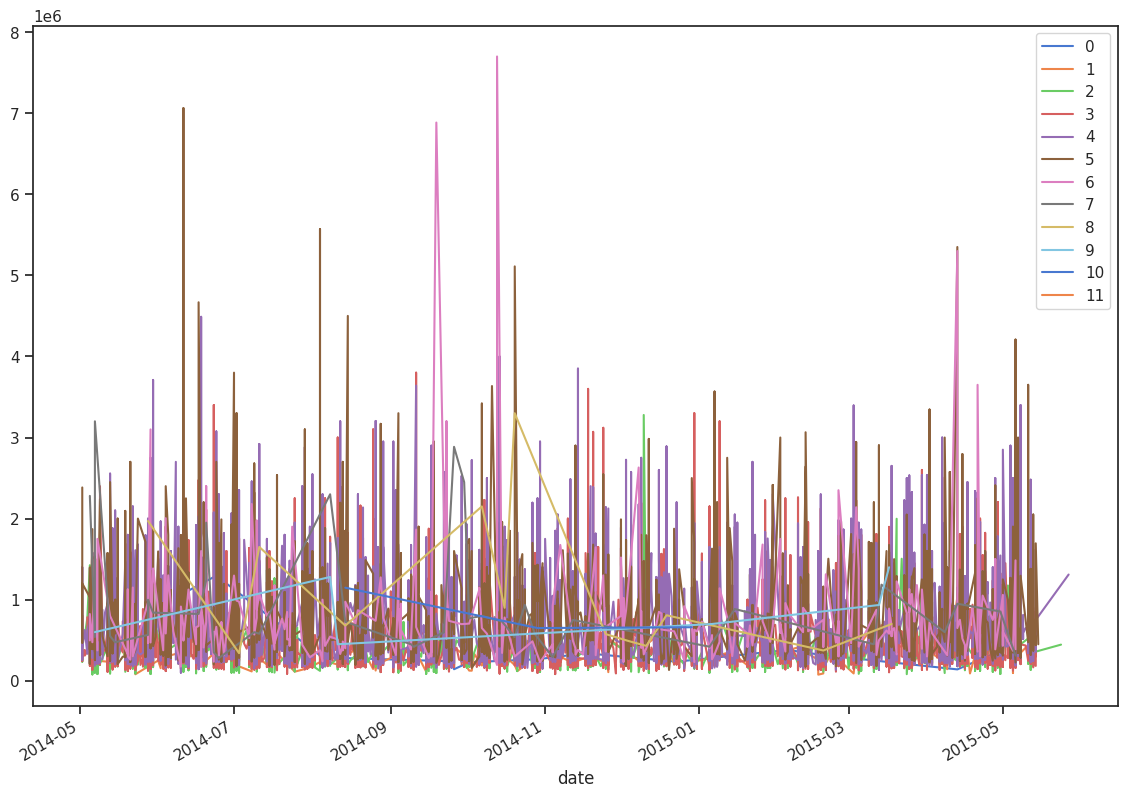

In [29]:
#graph for dates,price and bedrooms
fig,ax=plt.subplots(figsize=(14,10))
df.set_index('date').groupby('bedrooms')['price'].plot(legend=True)

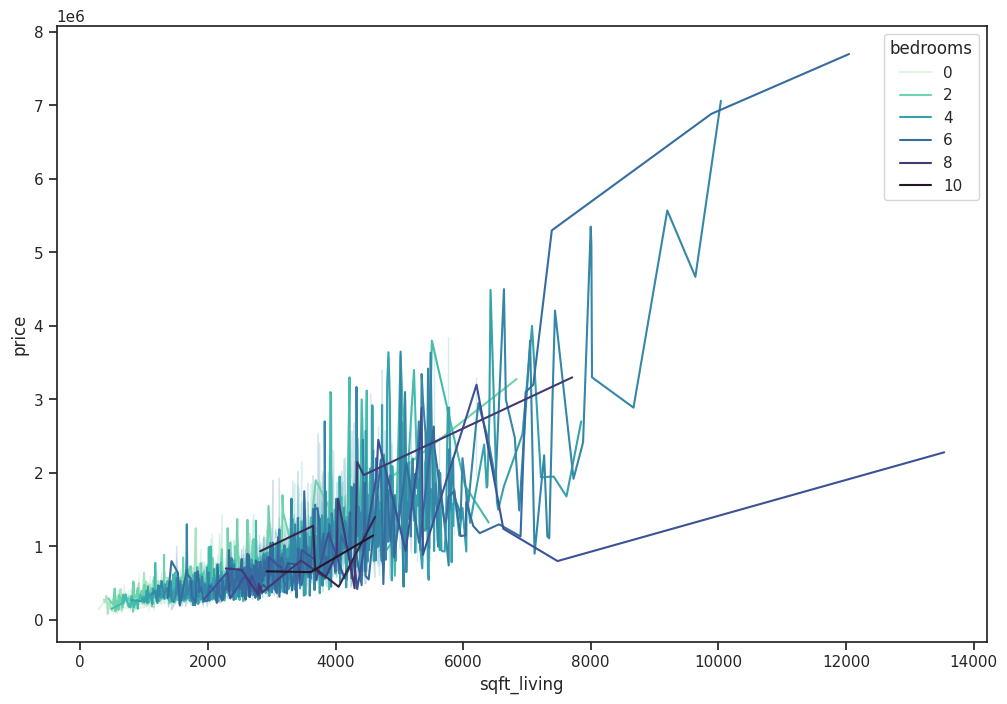

In [31]:
#lineplot for sqft living and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_living',y='price',data=df,hue='bedrooms',palette='mako_r')

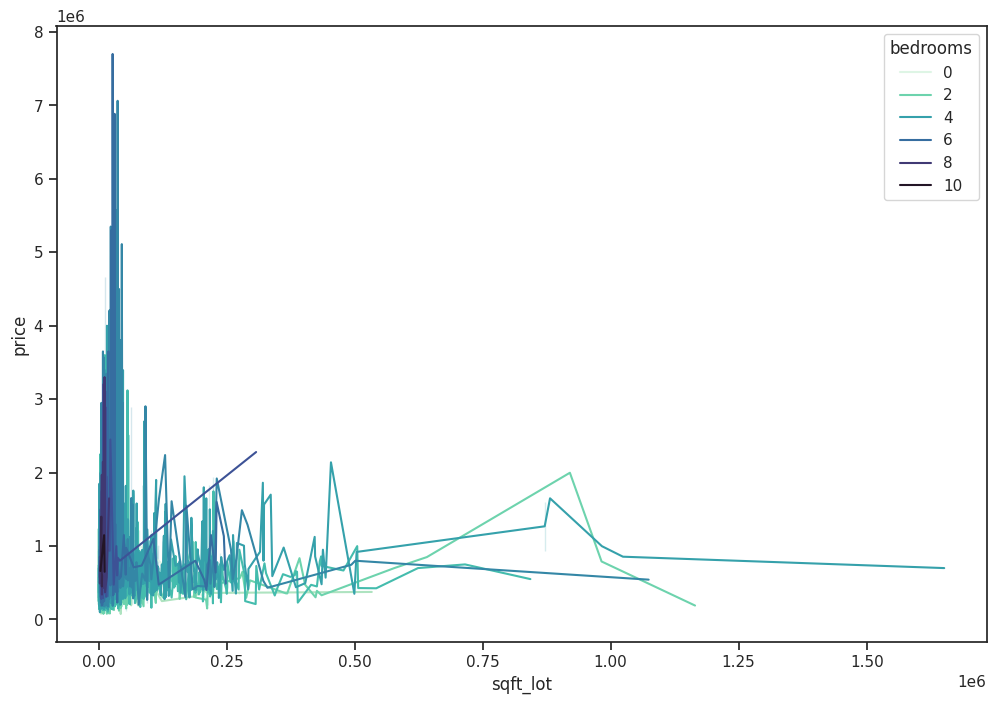

In [32]:
#lineplot for sqft lot and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_lot',y='price',data=df,hue='bedrooms',palette='mako_r')

In [33]:
#value counts of condition of the house
df['condition'].value_counts()

3    14031
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

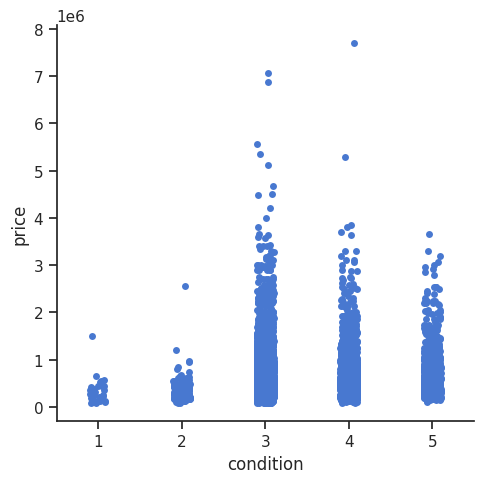

In [34]:
#catplot for condition and price
sns.catplot(x='condition',y='price',data=df)

[(0.0, 250000.0)]

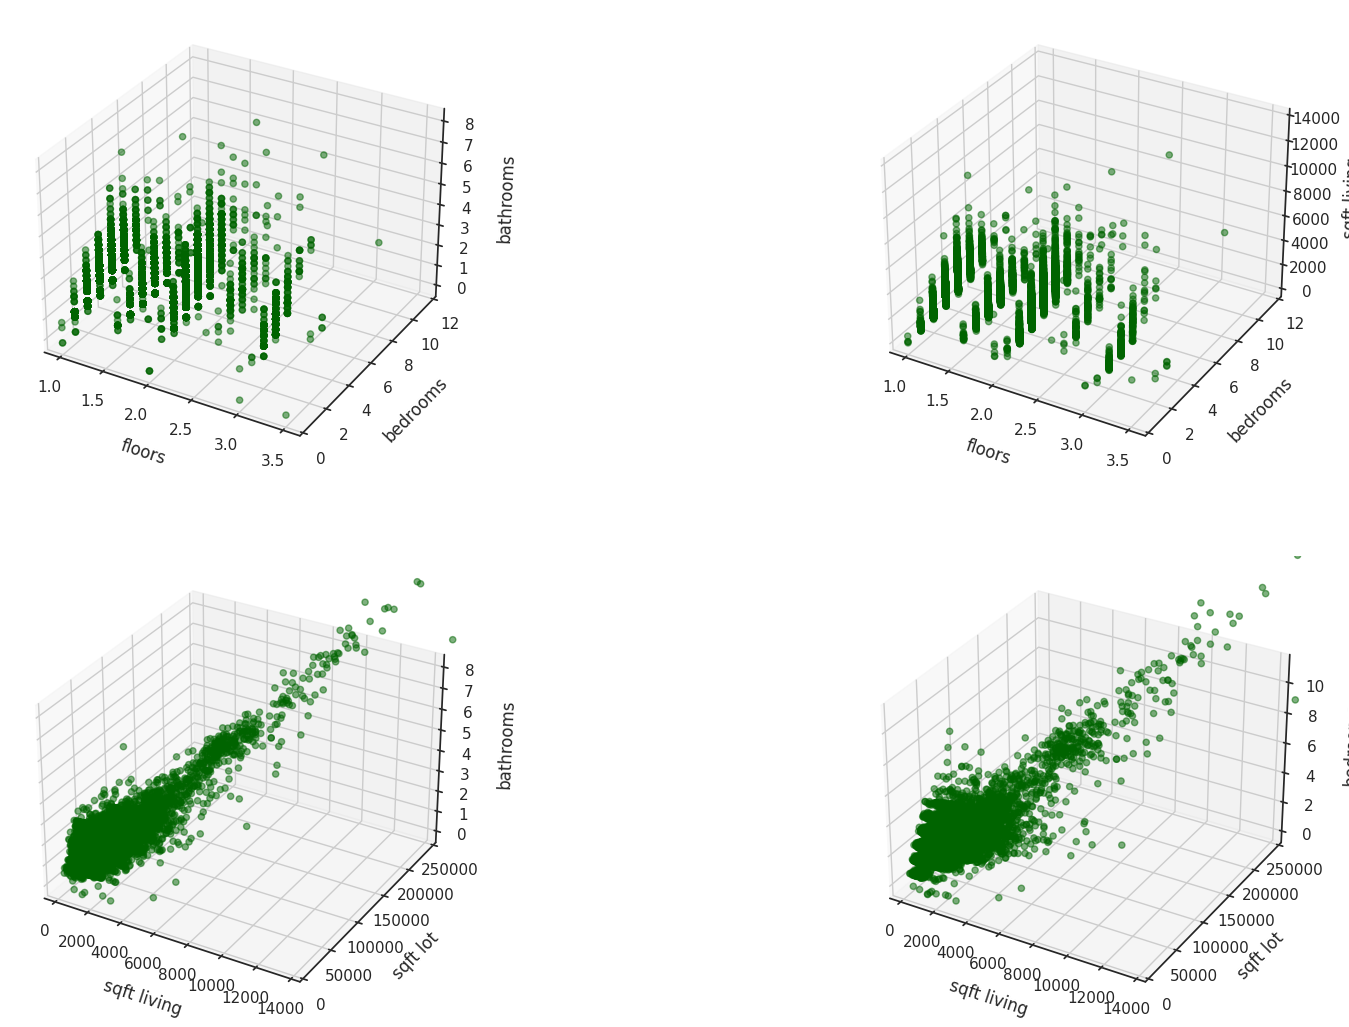

In [43]:
#3d plot
fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nbathrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nsqft living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbathrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbedrooms')
ax.set(ylim=[0,250000])

In [ ]:
#Preliminary Observation
#After observing the data and graphs carefully, we can observe that the price is mostly dependent on the location, no of bedrooms, bathrooms, sqft living, sqft lot, floors, condition. We can note a few points:

#(1) The frequency of no of bedrooms=3,4 is higher than any other bedrooms. The price of these are mostly similar, but some have giher price than usual because of the other features like bathrooms, location, etc.

#(2) The heatmap identifies the correlations between the features which help us in identifying how the features are dependent on each other which cannot be known by seeing the data. (Example: sqft living is dependent on grade of the house)

#3) The highest priced houses are sold in months: 9th to 11th. This shows people tend to spend more money on houses which are having more comforts in winter.

#(4) Most of the houses have sqft living in between 500 to 6000 irrespective of no of bedrooms. The higer the living space, the higher is the cost.

#(5) Price of the house is also dependent on sqft of lot (parking) as most people own their own car.

#(6) People are tending to pay less if the condition of the house is bad. They are spending more if the house is in good condition.

#(7) The 3d plot gives relationship between multiple features.

In [46]:
from abc import ABC, abstractmethod

# Super class for machine learning models

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""

    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass


class LinearModel(BaseModel):
    """
        Abstract class for a linear model

        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))

    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model

            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """
        pass

    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X

            parameters
            ----------
            X     2d array
                  input data

        """
        pass

In [47]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel):
    """
        LinearRegress class

        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)

    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        xtrans = X.T.dot(X)
        self.w = np.linalg.pinv(xtrans).dot(X.T).dot(T)
        self.w = self.w.T
        print(self.w)
        return self.w.T

    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        a=self.w.dot(X.T)
        return a.T


In [48]:
import collections # for checking iterable instance

# LMS class
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm

        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha

    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)

    # train LMS model one step
    # here the x is 1d vector
    def train_step(self, x, t):
        x = x.reshape(1,x.size)
        xr = self.add_ones(x)
        t = t.reshape(t.size,1)
        if self.w is None:
            self.w = np.zeros((xr.shape[1],1))
        self.w = self.w - self.alpha*(xr@self.w - t)*xr.T     ## TODO: replace this with your codes
        #else
            #self.w= self.train_step(x,t)

    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        return X1 @ self.w

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

[[ 3.2 -2. ]]


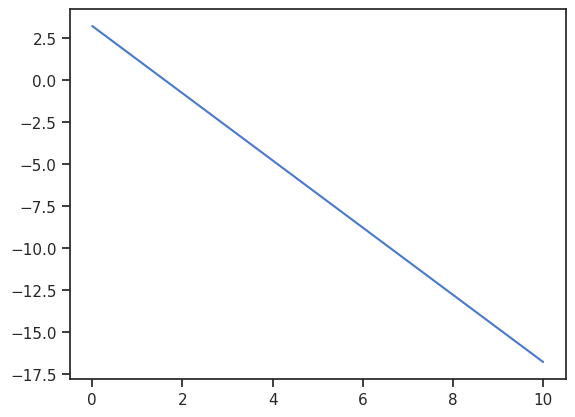

In [50]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

[[ 3.2 -2. ]]


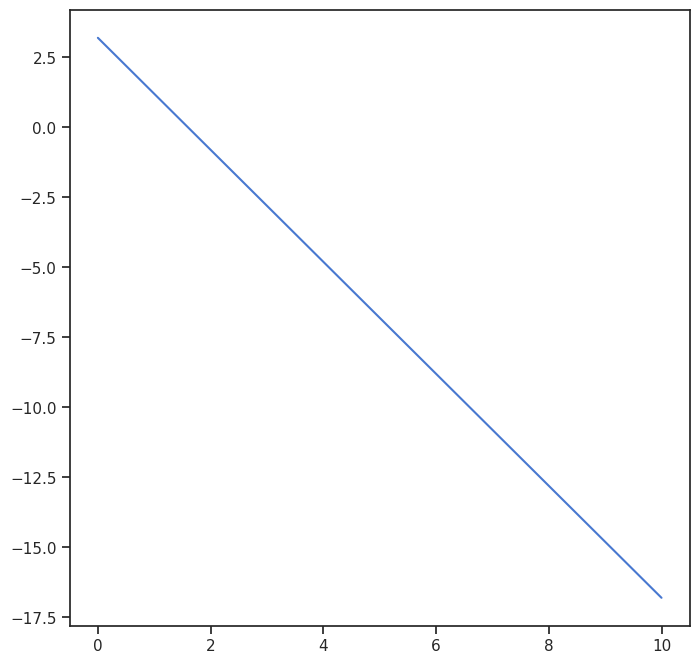

In [51]:
fig,ax=plt.subplots(figsize=(8,8))
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

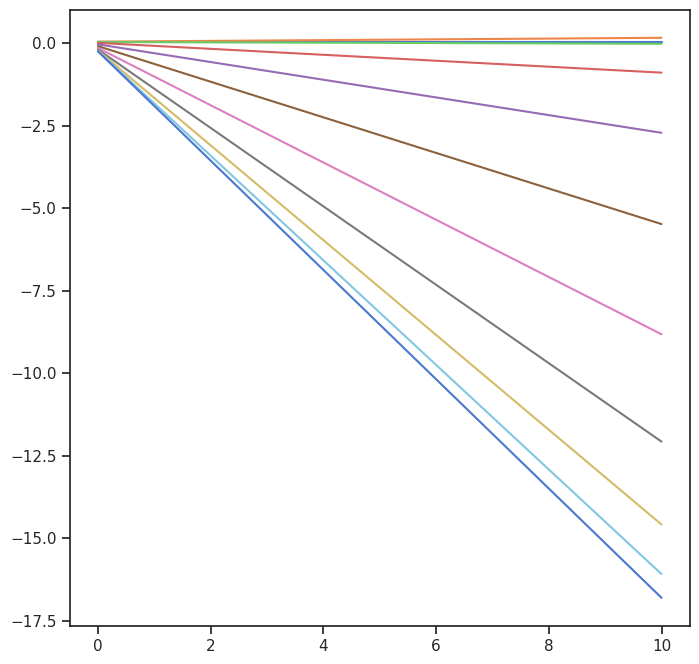

In [52]:
fig,ax=plt.subplots(figsize=(8,8))
lms = LMS(0.01)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

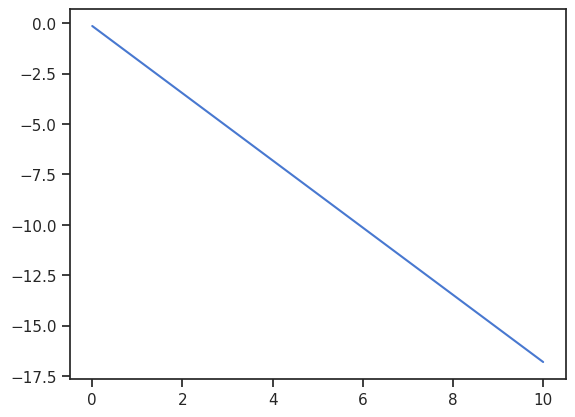

In [53]:
lms.train(X, T)
plt.plot(lms.use(X))

In [54]:
#We create X and y and find their values. Now y is an array and it is transposed.
X=df[['bedrooms','bathrooms','sqft_living','sqft_lot','condition','grade','floors']].values
y=df['price'].values
y=np.array([y])
y=y.transpose()

[[-7.31049240e+05 -4.75729214e+04 -1.40141340e+04  2.15823102e+02
  -3.61657891e-01  6.32273581e+04  1.07846617e+05 -1.55863701e+04]]


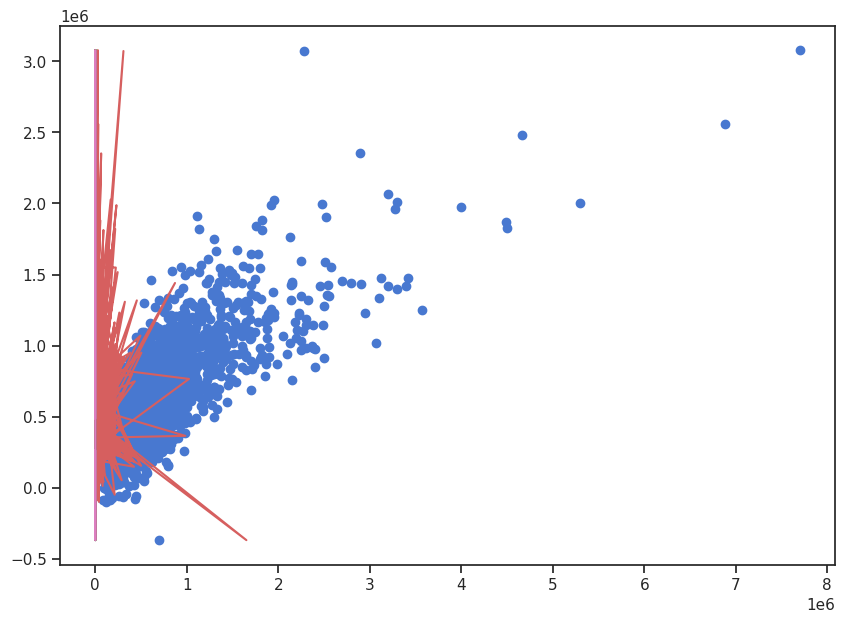

In [55]:
#We are plotting graph for train and prediction of the data for least squares
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)
ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)
fig,ax=plt.subplots(figsize=(10,7))
plt.scatter(y_test,y_pred)
plt.plot(X_test,ls.use(X_test))

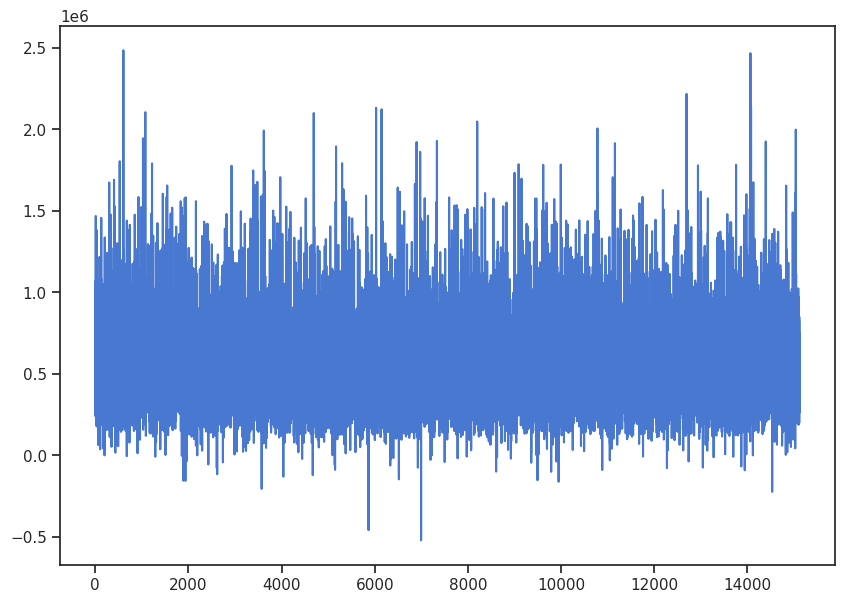

In [56]:
#plot the graph for X training set
fig,ax=plt.subplots(figsize=(10,7))
plt.plot(ls.use(X_train))

<ipython-input-57-cc46f3e97bae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=20);


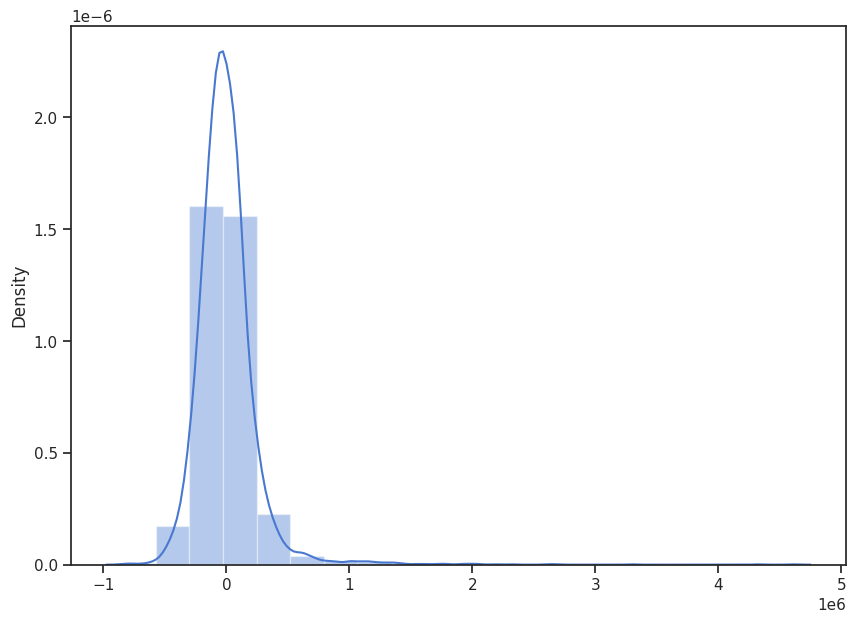

In [57]:
#we plot graph for difference between y test and y prediction
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot((y_test-y_pred),bins=20);

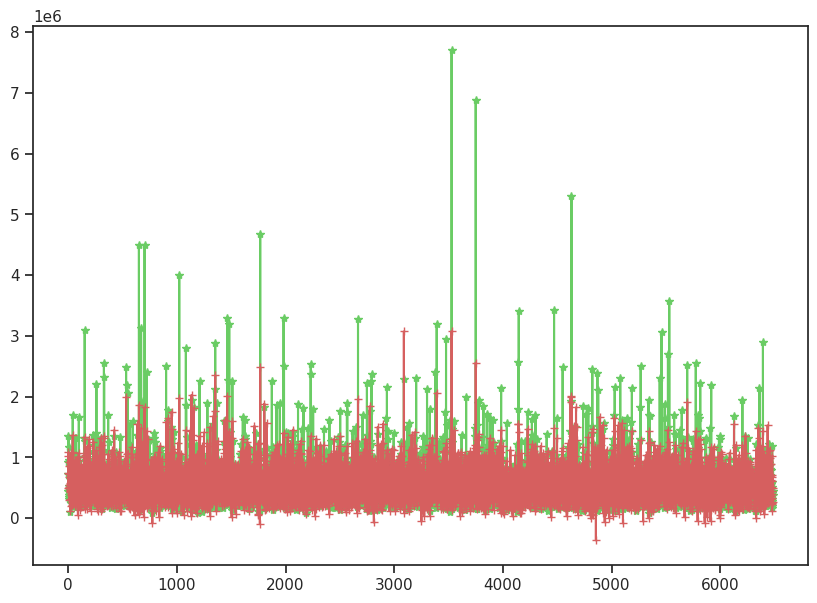

In [58]:
#plot graph for y test and y prediction to see the variation of the data
fig,ax=plt.subplots(figsize=(10,7))
plt.plot(y_test, 'g-*')
plt.plot(y_pred, 'r-+')

In [60]:
#Analysis / Comparision of Algorithms
#Least Squares

As the name implies, the method of Least Squares minimizes the sum of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear approximation. We calculate the distance from the line to a given data point by subtracting one from the other. We take the square of the difference because we don’t want the predicted values below the actual values to cancel out with those above the actual values.

The least squares regression analysis is easy to implement, It is faster, easy to compute and less overhead to the system. It has less senstivity to outliers. But the problem is, it is not normally distributed. It takes a lot of time to compute for larger datasets.

Least mean squares

As the name implies, the method of Least Mean Squares minimizes the mean of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear approximation. We calculate the distance from the line to a given data point by subtracting one from the other. We take the square of the difference and find mean of it because we don’t want the predicted values below the actual values to cancel out with those above the actual values.

The least mean squares regression analysis is faster, the data is normally distributed, it is good for large datsets. It is not much effected by the outliers. Not suggested for smaller datsets as it produces unexpected datasets.

SyntaxError: ignored

In [ ]:
Conclusion
The objective of this kernel is to create a linear regression model. We performed data preprocessing and
Exploratory data analysis on the dataset 'House Sales in King County, USA' to obtain the correlations between the features
and find which features are useful for predicting linear regression model. We are performing least squares
 and least mean sqaures for the given dataset.
 The least squares is perfect for smaller datasets, it is not normalized where as least mean squares is perfect for large datasets,
 we normalize the data for reducing the skewness of the data. We plot graphs for the line and see if it fits correctly for the data or not.
 The preliminary tests shows that we obtained both least squares and least mean squares correctly.